<img src="img/ikiam.png" width="500"/>

# EXAMEN PARCIAL PYTHON
    

## GBI6 - BIOINFORMÁTICA

**Almeida, Jhesel** 

**29-06-2023**

## Ejercicio 0.1 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Use el terminal para crear las carpetas `results` y `data`.
- Use el terminal y mueva `gstm.txt` que tiene un listado de accesiones de glutathione transferase a la carpeta `data`.


## Ejercicio 1 [4.0 puntos]

Cargue el módulo `popsimulate`, luego: 

1.1. explique lo que hace cada línea de la función `build_population`, simule un ejemplo y explique el resultado. 

1.2. explique lo que hace cada línea de la función `compute_frequencies`, simule un ejemplo y explique el resultado. 

1.3. explique lo que hace cada línea de la función `reproduce_population`, simule un ejemplo y explique el resultado. 

1.4. explique lo que hace cada línea de la función `simulate_drift`, simule un ejemplo y explique el resultado. 

In [8]:
import scipy
from popsimulate import build_population 


La funcion numero 1 produce una lista con los pares de alelos que puede ser dominante "A" o recesivo "a". La funcion pide como input dos valores, el primero el numero de individuos "N" que contendra la lista y el "p" que seria la probabilidad de que sea A o a. La funcion da como output una lista de pares de alelos. 

In [9]:
build_population (20, 0.4)

[('A', 'a'),
 ('a', 'a'),
 ('A', 'A'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'A'),
 ('a', 'a'),
 ('a', 'a'),
 ('A', 'a'),
 ('a', 'a'),
 ('A', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('A', 'A'),
 ('A', 'A'),
 ('A', 'A'),
 ('A', 'a'),
 ('a', 'a')]

Funcion 2 determina la frecuencia de las combinaciones del par de alelos. La entrada de la funcion es una lista que contenga los alelos y el output es la frecuencia en formato diccionario. 

In [16]:
poblacion = build_population(20,0.4)

from popsimulate import compute_frequencies 

compute_frequencies (poblacion)


{'AA': 1, 'aa': 12, 'Aa': 4, 'aA': 3}

Funcion 3 crea una nueva lista de pares de alelos a partir de una lista de alelos. En este caso para generar una nueva lista toma de manera aleatoria dos alelos de las diferentes posiciones de lista de entrada. La funcion como input es una lista de pares de alelos y como output una nueva lista de alelos. 

In [17]:
import numpy as np 

frequencies = compute_frequencies(poblacion)
from popsimulate import reproduce_population 
reproduce_population(poblacion)

[('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('A', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('A', 'a'),
 ('a', 'a'),
 ('a', 'A'),
 ('A', 'a'),
 ('a', 'a'),
 ('a', 'A'),
 ('a', 'A'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a'),
 ('a', 'a')]

En la funcion 3 calcula el numero de generaciones hasta llegar a tener una descendencia que sea completamente homocigota, es decir; "AA" o "aa". Por lo tanto, dentro de la funcion generamos primero la lista con los alelos a traves de la funcion build_population, despues calculamos la frecuencia de la lista de alelos a traves de compute_frequencies. Luego, mediante if comprobamos si son iguales el par de alelos, si no existe igualdad seguira iterando. La funcion necesita dos valores que son n, el numero de individus y p la probabilidad. El output es una lista de alelos y el numero a que corresponde la descendencia. 

In [21]:
#from popsimulate import simulate_drift
import numpy as np 
from popsimulate import simulate_drift 
simulate_drift(20, 0.4)

An allele reached fixation at generation 56
The genotype counts are
{'AA': 0, 'aa': 20, 'Aa': 0, 'aA': 0}


(56, {'AA': 0, 'aa': 20, 'Aa': 0, 'aA': 0})

## Ejercicio 2 [5.0 puntos]

Cree el modulo `glutransferase.py` y genere las siguientes funciones:

2.1. `source` que se conecte al `NCBI` y `Nucleotide` para extraer el nombre del organismo fuente y que cuente la frecuencia de cada especie. Guarde el resultado en `results/source.csv`

2.2. `sequences` que se conecte al `NCBI` y `Nucleotide` para extraer la secuencia de ADN, que se realice la traducción y separación de péptidos. Asegurarse que los péptidos empiezan en metionina. Luego calcule `molecular weight` e `instability index`. Genere un `joinplot` utilizando los valores de peso molecular e índice de estabilidad. Edite color, tamaño y tipo de puntos, asimismo etiquete adecuadamente el título y los ejes. Guarde los resultados en `results/glupeptides.csv` y `results/glupeptides.png`.

**No escriba las funciones en este cuaderno de jupyter**

2.3. Use la lista de accesiones en `data/gstm.txt`, cargue el módulo `glutransferase` y ejecute las dos funciones. 

In [31]:
from Bio import Entrez
from Bio import SeqIO  
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import collections
import pandas as pd  
import re
import matplotlib.pyplot as plt 
from glutransferase import source
from glutransferase import sequences

In [51]:
from Bio import Entrez
from glutransferase import sequences

In [58]:
source("data/gstm.txt")

,Especie,Frecuencia
0,Homo sapiens (human),3
1,Rattus rattus (black rat),1
2,Zea mays,1
3,Glycine max (soybean),2
4,Triticum aestivum (bread wheat),6
5,Carica papaya (papaya),1
6,Todarodes pacificus (Japanese flying squid),1
7,Onchocerca volvulus,1
8,Mus musculus domesticus (western European hous...,1
9,Gallus gallus (chicken),1


/home/jpramosg/.local/lib/python3.11/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


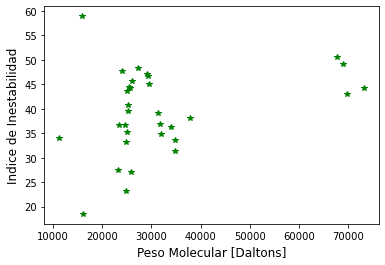

In [63]:
sequences("data/gstm.txt")

## Ejercicio 0.2 [0.5 puntos]


1. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

2. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1.1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2.1
```
```sh 
...
```
